# Project Outline - Water Quality

- Water Quality Dataset from Kaggel - https://www.kaggle.com/adityakadiwal/water-potability

- Predicting podability based on existing features without potability feature

- Testing our predictions on original database potability feature

- Create a feature that is MORE then binary for potability

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import pydotplus
import ds_models

from six             import StringIO
from IPython.display import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline                import Pipeline
from sklearn.impute                  import SimpleImputer
from sklearn.preprocessing           import StandardScaler, OneHotEncoder, normalize
from sklearn.model_selection         import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics                 import mean_squared_error, mean_squared_log_error, accuracy_score
from sklearn.metrics                 import plot_confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.tree         import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble     import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble     import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm          import SVC

import warnings
warnings.filterwarnings('ignore')

# Data Exploration and Cleaning

In [2]:
df = pd.read_csv('water_potability.csv')

### Raw Potability Histogram

(array([1998.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1278.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

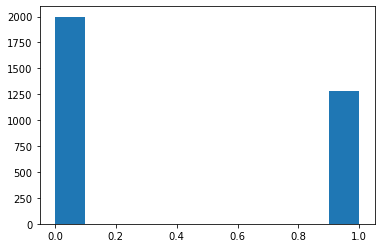

In [3]:
plt.hist(df['Potability'])

### Cleaning NaN values

In [4]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df1 = df.dropna()

### Clean Potability Histogram

(array([1200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         811.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

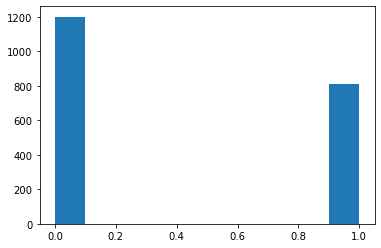

In [6]:
plt.hist(df1['Potability'])

# Data Instantiation

In [7]:
X = df1.drop(columns=['Potability'], axis=1)
y = df1['Potability']

# Model Instantiation

## Gaussian Naive Bayes

In [8]:
#model = GaussianNB()
#model = BaggingClassifier(GaussianNB())
#model = AdaBoostClassifier(GaussianNB())

## KNeighbors Classifier

In [9]:
#model = KNeighborsClassifier()
#knc_grid   = {'n_neighbors': [1, 2, 3, 4, 5], 'weights': ['uniform', 'distance']}
#model      = GridSearchCV(KNeighborsClassifier(), knc_grid, scoring='accuracy', verbose=1)
#model      = AdaBoostClassifier(KNeighborsClassifier())

## Logistic Regression

In [10]:
#model = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='auto')
#logreg_grid = {'C': [1, 2, 3], 'solver': [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]}
#model       = GridSearchCV(LogisticRegression(), logreg_grid, scoring='accuracy', verbose=1)

## Decision Tree Classifier

In [11]:
#model = DecisionTreeClassifier()
#dtc_grid = {'criterion': ['gini', 'entropy'], 'max_depth':[1, 2, 3, 4, 5]}
#model    = GridSearchCV(DecisionTreeClassifier(), dtc_grid, scoring='accuracy', verbose=1)

## Bagging Classifier

In [12]:
#model = BaggingClassifier()
#bc_grid = {'n_estimators': [10, 20, 30, 40, 50], 'oob_score':['True', 'False']}
#model   = GridSearchCV(BaggingClassifier(), bc_grid, scoring='accuracy', verbose=1)

## Random Forest Classifier

In [13]:
#model = RandomForestClassifier()
#rfc_grid = {'n_estimators': [100, 200], 'criterion':['gini', 'entropy'], 
#            'oob_score':['True', 'False'], 'max_depth': [3, 4, 5, 6, 7, 8]}
#model    = GridSearchCV(RandomForestClassifier(), rfc_grid, scoring='accuracy', verbose=1)

## Adaptive Boosting Classifier

In [14]:
#model = AdaBoostClassifier()

## Gradient Boosting Classifier

In [15]:
#model = GradientBoostingClassifier()

## Support Vector Classification

In [16]:
#model = SVC()
#svc_grid = {'C': [1, 2, 3], 'kernel': [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’]}
#model    = GridSearchCV(SVC(), svc_grid, scoring='accuracy', verbose=1)

# Model Function

In [17]:
def ds_models(model, X, y, model_name, output, scale=False, clean=False, fi=False, tree=False, cvs=False, vc=False):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.25, random_state=1)
        
    if scale == True:
        
        scaler  = StandardScaler()  
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)  
        X_test  = scaler.transform(X_test) 
        
    if clean == True:
    
        cont_features = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]        
        X_train_cont  = X_train.loc[:, cont_features]
        X_test_cont   = X_test.loc[:, cont_features]
        
        impute          = SimpleImputer(strategy='median') 
        X_train_imputed = impute.fit_transform(X_train_cont)
        X_test_imputed  = impute.transform(X_test_cont)
        
        features_cat = [col for col in X.columns if X[col].dtype in [np.object]]
        X_train_cat  = X_train.loc[:, features_cat]
        X_test_cat   = X_test.loc[:, features_cat]
        
        X_train_cat.fillna(value='missing', inplace=True)
        X_test_cat.fillna(value='missing', inplace=True)
        
        scaler                 = StandardScaler()
        X_train_imputed_scaled = scaler.fit_transform(X_train_imputed)
        X_test_imputed_scaled  = scaler.transform(X_test_imputed)
        
        ohe         = OneHotEncoder(handle_unknown='ignore')
        X_train_ohe = ohe.fit_transform(X_train_cat)
        X_test_ohe  = ohe.transform(X_test_cat)

        columns      = ohe.get_feature_names(input_features=X_train_cat.columns)
        cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
        cat_test_df  = pd.DataFrame(X_test_ohe.todense(), columns=columns)
                                    
        X_train     = pd.concat([pd.DataFrame(X_train_imputed_scaled), cat_train_df], axis=1)
        X_test_all  = pd.concat([pd.DataFrame(X_test_imputed_scaled), cat_test_df], axis=1)
    
    model.fit(X_train, y_train)
        
    if output == 'class':
                
        print('\033[1m' + model_name + ' Train Data Confusion Matrix:\n')
        plot_confusion_matrix(model, X_train, y_train, cmap=plt.cm.Blues)
        plt.show()
        print('\033[1m' + model_name + ' Test Data Confusion Matrix:\n')
        plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
        plt.show()        
        print('\033[1m' + model_name + ' Train Report:\n' + '\033[0m')
        print(classification_report(y_train, model.predict(X_train)))
        print('\033[1m' + model_name + ' Test Report:\n' + '\033[0m')
        print(classification_report(y_test, model.predict(X_test)))
    
    if output == 'reg':
                        
        print('\033[1m' + model_name + ' Training r^2:\n' + '\033[0m', 
        model.score(X_train, y_train))
        print('\n' + '\033[1m' + model_name + ' Test r^2:\n' + '\033[0m', 
        model.score(X_test_all, y_test))
        print('\n' + '\033[1m' + model_name + ' Training MSE:\n' + '\033[0m', 
        mean_squared_error(y_train, model.predict(X_train)))
        print('\n' + '\033[1m' + model_name + ' Test MSE:\n' + '\033[0m', 
        mean_squared_error(y_test, model.predict(X_test_all)))
        print('\n' + '\033[1m' + model_name + ' Training RMSE:\n' + '\033[0m', 
        mean_squared_error(y_train, model.predict(X_train))**0.5)
        print('\n' + '\033[1m' + model_name + ' Test RMSE:\n' + '\033[0m', 
        mean_squared_error(y_test, model.predict(X_test_all))**0.5)
        
    if fi == True:
        
        print('\033[1m' + 'Feature Importances:' + '\n' + '\033[0m')
        print(model.feature_importances_)
        plt.barh(X.columns, model.feature_importances_)
        plt.title('Feature Importances')
        
    if tree == True:         

        dot_data = StringIO()
        export_graphviz(model, out_file=dot_data, rounded=True, special_characters=True)
        graph    = pydotplus.graph_from_dot_data(dot_data.getvalue())
        print('\n' + '\033[1m' + 'Decision Tree:' + '\033[0m')
        display(Image(graph.create_png()))
        
    if cvs == True:

        depth_range = range(1,10)
        val = []
        for depth in depth_range:
            mod = DecisionTreeClassifier(max_depth = depth)
            depth_score = cross_val_score(mod, X, y, cv = 10)
            val.append(depth_score.mean())
        print('\n' + '\033[1m' + 'Cross Validation Scores:' + '\n' + '\033[0m')
        print(val)
        print('\n' + '\033[1m' + 'Cross Validation Curve:' + '\n' + '\033[0m')
        plt.figure(figsize = (10,10))
        plt.plot(depth_range, val)
        plt.xlabel('Range Of Depth')
        plt.ylabel('Cross Validated Values')
        plt.show()
        
    if vc == True:
        
        depth_range = range(1,10)
        mse = []
        for depth in depth_range:
            mod = DecisionTreeRegressor(max_depth = depth)
            depth_score = cross_val_score(mod, X, y, scoring = 'neg_mean_squared_error', cv = 6)
            mse.append(depth_score.mean())
        print('\n' + '\033[1m' + 'MSE:' + '\n' + '\033[0m')
        print(mse)
        print('\n' + '\033[1m' + 'Validation Curve:' + '\n' + '\033[0m')
        mse = [abs(number) for number in mse]
        plt.figure(figsize = (10,10))
        plt.plot(depth_range, mse)
        plt.xlabel('Range Of Depth')
        plt.ylabel('MSE')
        plt.show()
        
    return model


# Testing 

### Gaussian Naive Bayes - Vanilla

In [18]:
#model = GaussianNB()

#gnb = ds_models(model, X, y, model_name='Gaussian Naive Bayes - Vanilla', output='class')

### KNeighbors Classifier - Vanilla

In [19]:
#model = KNeighborsClassifier()

#knc = ds_models(model, X, y, model_name='KNeighbors Classifier - Vanilla', output='class')

### Logistic Regression - Vanilla

In [20]:
#model = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='auto')

#lrc = ds_models(model, X, y, model_name='Logistic Regression - Vanilla', output='class')

### Decision Tree Classifier - Vanilla

In [21]:
#model = DecisionTreeClassifier()

#dtc = ds_models(model, X, y, model_name='Decision Tree Classifier - Vanilla', output='class', fi=True)

### Bagging Classifier - Vanilla

In [22]:
#model = BaggingClassifier()

#bc = ds_models(model, X, y, model_name='Bagging Classifier - Vanilla', output='class')

### Random Forest Classifier - Vanilla

In [23]:
#model = RandomForestClassifier()

#rfc = ds_models(model, X, y, model_name='Randmon Forest Classifier - Vanilla', output='class', fi=True)

### Adaptive Boosting Classifier - Vanilla

In [24]:
#model = AdaBoostClassifier()

#abc = ds_models(model, X, y, model_name='Adaptive Boosting Classifier - Vanilla', output='class', fi=True)

### Gradient Boosting Classifier - Vanilla

In [25]:
#model = GradientBoostingClassifier()

#gbc = ds_models(model, X, y, model_name='Gradient Boosting Classifier - Vanilla', output='class', fi=True)

### Support Vector Classification - Vanilla

Support Vector Classification - Vanilla Train Data Confusion Matrix:



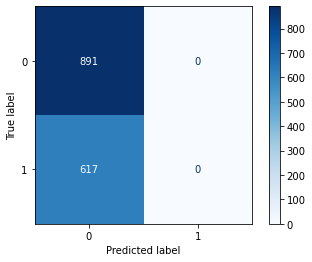

Support Vector Classification - Vanilla Test Data Confusion Matrix:



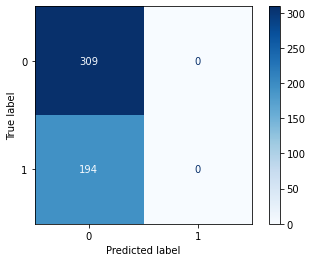

Support Vector Classification - Vanilla Train Report:

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       891
           1       0.00      0.00      0.00       617

    accuracy                           0.59      1508
   macro avg       0.30      0.50      0.37      1508
weighted avg       0.35      0.59      0.44      1508

Support Vector Classification - Vanilla Test Report:

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       309
           1       0.00      0.00      0.00       194

    accuracy                           0.61       503
   macro avg       0.31      0.50      0.38       503
weighted avg       0.38      0.61      0.47       503



In [26]:
#model = SVC()

#svc = ds_models(model, X, y, model_name='Support Vector Classification - Vanilla', output='class')